# Primeiro trabalho - Random Walk
Discente: Ábner Pereira

# Índice
- [Primeiro caso de teste](#Primeiro-caso-de-teste)
   - [Função objetivo](#Função-objetivo)
   - [Equação](#Equação)
   - [Faixas](#Faixas)
   - [Funções](#Funções)
   - [Execução](#Execução)
   - [Visualização](#Visualização)
- [PSO](#PSO)

# Primeiro caso de teste

Nesta atividade será desenvolvido um Random Walk para achar o mínimo da [função objetivo](#Função-objetivo) abaixo . Usando uma distribuição uniforme para gerar uma população de sequências (x1, x2, e x3) de números reais variando de 0 a 1, convertidos respectivamente segundo as [faixas](#Faixas) de x1, x2 e x3, sob a [Equação](#Equação) abaixo.

### Função objetivo

In [415]:
from IPython.display import display, Math, Latex
display(Math(r'Fun = 10 \times (x_1 - 1)^{2} + 20 \times (x_2 - 2)^{2} + 30 \times (x_3 - 3)^{2}'))

<IPython.core.display.Math object>

### Equação

In [416]:
display(Math(r"x_i'= LB_{x_i} + (UB{x_i} - LB{x_i}) \times valor_i"))

<IPython.core.display.Math object>

### Faixas

In [417]:
display(Math(r'LB_{x_1} = -3, UB_{x_1} = 3'))
display(Math(r'LB_{x_2} = -2, UB_{x_2} = 4'))
display(Math(r'LB_{x_3} = 0, UB_{x_3} = 6'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Funções

In [418]:
def populacao_a(x_inf, x_sup, qtd_seqs, qtd_valores):
  #valores a aleatórios
  populacao = [[]]
  populacao = np.random.uniform(x_inf,x_sup,(qtd_seqs,qtd_valores))
  return populacao

In [419]:
def populacao_n(lb, ub, qtd_seqs, qtd_valores, populacao):
  #conversão nas faixas
  i = 0
  for i in range(qtd_seqs):
    j = 0
    for j in range(qtd_valores):
      # equação 1 em cada valor
      populacao[i][j] = lb[j] + (ub[j] - lb[j]) * populacao[i][j]
      j += 1
    i += 1
  return populacao

In [420]:
def funcao_obj(x1, x2, x3):
  y = 0
  y = 10 * (x1 - 1)**2 + 20 * (x2 - 2)**2 + 30 * (x3 - 3)**2
  return y

In [421]:
def resultado(qtd_seqs, qtd_valores, populacao):
  i = 0
  x = [0,0,0]
  y = []
  for i in range(qtd_seqs):
    j = 0
    for j in range(qtd_valores):
      x[j] = populacao[i][j]
      j += 1
    y.append(funcao_obj(x[0], x[1], x[2]))
    i += 1
  return y

### Execução

In [422]:
import numpy as np
import pandas as pd

In [423]:
#Entrada
x_inf = 0
x_sup = 1
qtd_seqs = 20
qtd_valores = 3
qtd_geracoes = 20
qtd_execucoes = 5
lb = [-3, -2, 0] 
ub = [3, 4, 6]

df_populacao = pd.DataFrame(None, columns=["x1", "x2", "x3", "y"]) #melhores indivíduos por geração
df_fitness =  pd.DataFrame(None, columns=["x1", "x2", "x3", "y"]) #melhor fitness por geração
df_solucoes = pd.DataFrame(None, columns=["x1", "x2", "x3", "y"]) #melhores resultados por execução do algoritmo
df_dispersao =  pd.DataFrame(None, columns=["mean", "std"]) #valores por  execução do algoritmo

In [424]:
i = 0
for i in range(qtd_execucoes):
  j = 0
  for j in range(qtd_geracoes):
    #Criando população com indivíduos aleatórios com valores entre X_INF e X_SUP convertendo-os às faixas
    if j == 0:
      populacao_final = []
      populacao_final = populacao_n(lb, ub, qtd_seqs, qtd_valores, populacao_a(x_inf, x_sup, qtd_seqs, qtd_valores))
    else:
      populacao_final = []
      populacao_final = populacao_n(lb, ub, meio, qtd_valores, populacao_a(x_inf, x_sup, meio, qtd_valores))

    #Gerando resultado para cada indivíduo
    if j == 0:
      valores_r = []
      valores_r = resultado(qtd_seqs, qtd_valores, populacao_final)
    else:
      valores_r = []
      valores_r = resultado(meio, qtd_valores, populacao_final)
    
    #Guardando novos resultados no Data Frame
    df_pf = pd.DataFrame(populacao_final, columns=["x1", "x2", "x3"])
    df_pf["y"] = valores_r
    df_populacao = pd.concat([df_populacao, df_pf])
    
    #Ordenando indivíduos/resultados
    df_populacao.sort_values(by=["y"], inplace=True)
    df_populacao.reset_index(drop=True, inplace=True)
    
    #Guardando melhor fitness da geração
    df_fitness = df_fitness.append(df_populacao.iloc[[0]], ignore_index=True)

    #Excluindo 50% piores indivíduos
    meio = int(len(df_populacao)/2)
    df_populacao.drop(df_populacao[df_populacao.index >= meio].index, inplace=True)
    df_populacao.reset_index(drop=True, inplace=True)

    j += 1
    
  #Guardando melhor resultado de cada execução
  df_solucoes = df_solucoes.append(df_populacao.iloc[[0]], ignore_index=True)

  #Calculando a média e desvio padrão entre os melhores fitness da execução  
  df_dispersao = df_dispersao.append(df_populacao["y"].describe().loc[["mean", "std"]], ignore_index=True)

  i+=1

### Visualização

**Melhores resultados por geração**

In [425]:
df_fitness

,x1,x2,x3,y
0,-0.036885,2.317380,2.626031,16.961487
1,-0.036885,2.317380,2.626031,16.961487
2,-0.036885,2.317380,2.626031,16.961487
3,1.235263,1.594146,3.495978,11.227672
4,1.235263,1.594146,3.495978,11.227672
...,...,...,...,...
95,0.986386,2.028016,3.165967,0.843905
96,0.986386,2.028016,3.165967,0.843905
97,0.986386,2.028016,3.165967,0.843905
98,0.986386,2.028016,3.165967,0.843905


**Melhores resultados por execução**

In [426]:
df_solucoes

,x1,x2,x3,y
0,1.235263,1.594146,3.495978,11.227672
1,1.249254,2.452902,3.202347,5.952014
2,1.249254,2.452902,3.202347,5.952014
3,1.094601,2.278867,3.012956,1.649862
4,0.986386,2.028016,3.165967,0.843905


**Média e desvio padrão dos fitness por execução**

In [427]:
df_dispersao

,mean,std
0,18.619380,5.472913
1,16.143192,4.048240
2,15.659178,3.629710
3,11.770506,3.961673
4,9.431592,3.519809


In [428]:
import matplotlib.pyplot as plt
import seaborn as sbn

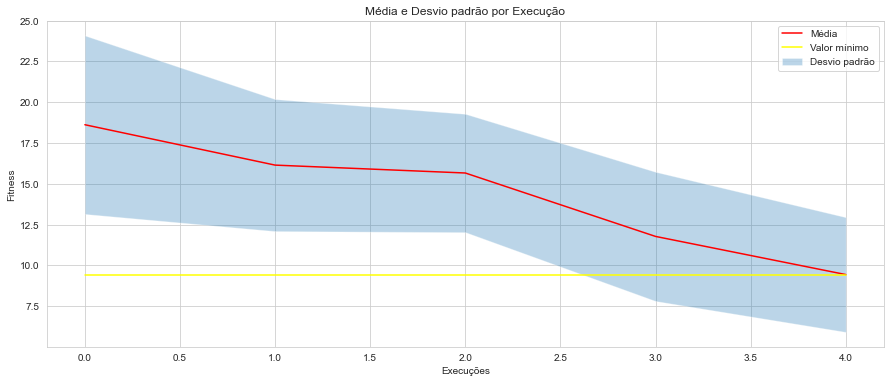

In [429]:
sbn.set_style("whitegrid")
plt.figure(figsize=(15,6))
plt.plot(df_dispersao.index, df_dispersao["mean"], label='Média', color="red")
plt.fill_between(range(len(df_dispersao)), df_dispersao["mean"]-df_dispersao["std"], df_dispersao["mean"]+df_dispersao["std"], alpha=0.3, label='Desvio padrão')
plt.plot(df_dispersao.index, [min(df_dispersao["mean"]) for i in range(len(df_dispersao.index))], label="Valor mínimo", color="yellow")
plt.xlabel('Execuções')
plt.ylabel('Fitness')
plt.title("Média e Desvio padrão por Execução")
plt.legend()
plt.show()

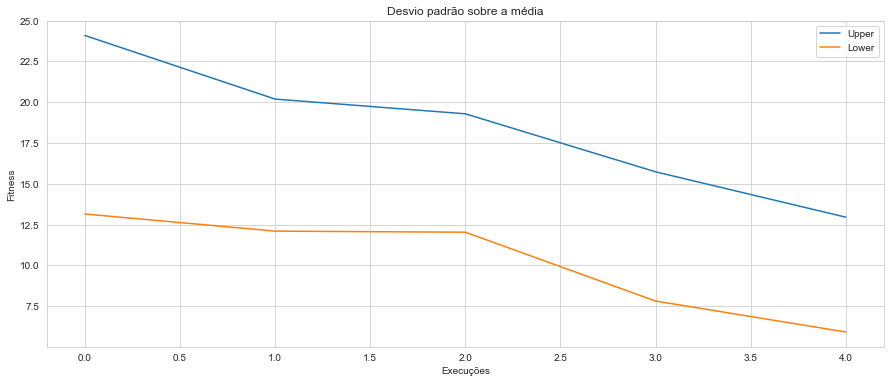

In [430]:
sbn.set_style("whitegrid")
plt.figure(figsize=(15,6))
plt.plot(df_dispersao.index, df_dispersao["mean"] + df_dispersao["std"], label='Upper')
plt.plot(df_dispersao.index, df_dispersao["mean"] - df_dispersao["std"], label='Lower')
plt.xlabel('Execuções')
plt.ylabel('Fitness')
plt.title("Desvio padrão sobre a média")
plt.legend()
plt.show()

> <p align="justify">Através dos resultados apresentados podemos observar que a população está convergindo à solução ótima (se pensarmos em minimização) neste algoritmo quando vemos que a média continua se aproximando de zero.<br>
Podemos ainda visualizar através do gráficos acima que o desvio padrão (máximo e mínimo) calculado sobre os melhores resultados selecionados um entre todas as populações por execução se aproxima cada vez mais da curva que representa a média sobre os mesmos resultados selecionados, porém ainda apresenta um valor elevado em comparação à média, nos deixando com uma baixa confiabilidade no algoritmo.</p>


# PSO

In [431]:
#Parâmetros de inicialização

w_min = .4            #peso de inércia mínimo
w_max = .9            #peso de inércia máximo
c1 = 2                #fator de aceleração - cognitivo
c2 = 2                #fator de aceleração - social

df_swarm = pd.DataFrame(columns=['x1', 'x2', 'x3', 'y'])
df_gBest = pd.DataFrame(columns=['x1', 'x2', 'x3', 'y'])
df_xBest = pd.DataFrame(columns=['x1', 'x2', 'x3', 'y'])
df_melhores = pd.DataFrame(columns=['x1', 'x2', 'x3', 'y'])

df_solucoes2 = pd.DataFrame(None, columns=["x1", "x2", "x3", "y"]) #melhores resultados por execução do algoritmo
df_dispersao2 =  pd.DataFrame(None, columns=["mean", "std"]) #valores por  execução do algoritmo

### Funções

In [432]:
def updatePosition(velocitys, swarm):
  for i in range(0, qtd_seqs):
    for j in range(0, qtd_valores):
      swarm[i][j] = velocitys[i][j] + swarm[i][j] #atualiza posição de cada partícula
      j += 1
    i += 1
  return swarm

def orderFitness():
  df_swarm.sort_values(by=["y"], inplace=True)
  df_swarm.reset_index(drop=True, inplace=True)
  df_xBest.sort_values(by=["y"], inplace=True)
  df_xBest.reset_index(drop=True, inplace=True)

def gBest(swarm):
  melhor_g = swarm.iloc[[0]]
  return melhor_g

def xBest(df_xB, swarm):
  for i in range(0, qtd_seqs):
    if df_xB.loc[i]["y"] > swarm.loc[i]["y"]:
      df_p1 = swarm.iloc[[i]]
      if df_xB.index[i] == 0:
        df_xB = pd.concat([df_p1, df_xB.loc[i+1:]])
      elif (df_xB.index[i] > 0) and (df_xB.index[i] < qtd_seqs-1):
        df_xB = pd.concat([df_xB.loc[0:i-1], df_p1, df_xB.loc[i+1:]])
      else:
        df_xB = pd.concat([df_xB.loc[0:i-1], df_p1])
    i += 1
  return df_xB

def updateVelocity(t, velocitys, gBest, xBest, swarm):
  r1 = np.random.uniform(0, 1)
  r2 = np.random.uniform(0, 1)
  w = w_max - (w_max - w_min) * t / qtd_geracoes
  for i in range(0, qtd_seqs):
    for j in range(0, qtd_valores):
      velocitys[i][j] = abs(w * velocitys[i][j] + c1 * r1 * (xBest.loc[i][j] - swarm.loc[i][j]) + c2 * r2 * (gBest.loc[0][j] - swarm.loc[i][j]))
      j += 1
    i += 1
  return velocitys

### Execução

In [433]:
# INICIANDO EXECUÇÕES
for i in range(0, qtd_execucoes):
  swarm = []
  swarm = populacao_n(lb, ub, qtd_seqs, qtd_valores, populacao_a(x_inf, x_sup, qtd_seqs, qtd_valores))
  velocitys = np.zeros((qtd_seqs, qtd_valores))
  for i in range(0, qtd_seqs):
    for j in range(0, qtd_valores):
      velocitys[i][j] = 0.1 * swarm[i][j] #calculo inicial da velocidade por valor de partícula
      j += 1
    i += 1
  swarm = populacao_n(lb, ub, qtd_seqs, qtd_valores, updatePosition(velocitys, swarm))

  valores_r = []
  valores_r = resultado(qtd_seqs, qtd_valores, swarm)

  df_pf = pd.DataFrame(swarm, columns=["x1", "x2", "x3"])
  df_pf["y"] = valores_r
  df_swarm.drop(df_swarm[df_swarm.index >= 0].index, inplace=True)
  df_swarm.reset_index(drop=True, inplace=True)
  df_swarm = pd.concat([df_swarm, df_pf])
 
  orderFitness()

  df_gBest = df_swarm.iloc[[0]]
  df_xBest = df_swarm
  
  # INICIANDO GERAÇÕES
  for t in range(0, qtd_geracoes):

    velocitys = updateVelocity(t, velocitys, df_gBest, df_xBest, df_swarm)
    
    swarm = populacao_n(lb, ub, qtd_seqs, qtd_valores, updatePosition(velocitys, swarm))
    
    valores_r = []
    valores_r = resultado(qtd_seqs, qtd_valores, swarm)
  
    df_pf = pd.DataFrame(swarm, columns=["x1", "x2", "x3"])
    df_pf["y"] = valores_r

    df = pd.DataFrame(df_xBest)

    df_swarm.drop(df_swarm.index, inplace=True)
    df_swarm.reset_index(drop=True, inplace=True)
    df_swarm = pd.concat([df_swarm, df_pf])
    df_xBest = df

    df_xBest = xBest(df_xBest, df_swarm)

    orderFitness()

    df_gBest = gBest(df_gBest)
    
    df_melhores = df_melhores.append(df_swarm.iloc[[0]], ignore_index=True)
    t += 1

  #Guardando melhor resultado de cada execução
  df_solucoes2 = df_solucoes.append(df_swarm.iloc[[0]], ignore_index=True)

  #Calculando a média e desvio padrão entre os melhores fitness da execução
  df_dispersao2 = df_dispersao.append(df_solucoes["y"].describe().loc[["mean", "std"]], ignore_index=True)

  i+=1

### Visualização

**Melhores resultados por geração**

In [434]:
df_melhores

,x1,x2,x3,y
0,4.469423e+01,-5.524795e+00,7.706342e+01,1.847860e+05
1,3.053992e+02,9.137332e+02,1.083232e+03,5.255878e+07
2,3.572944e+03,1.213433e+04,1.356295e+04,8.587622e+09
3,7.871476e+04,2.670996e+05,2.987642e+05,4.166529e+12
4,1.392085e+06,4.724043e+06,5.283965e+06,1.303318e+15
...,...,...,...,...
95,6.047920e+19,5.472541e+19,7.727327e+19,2.756095e+41
96,1.064980e+21,9.636613e+20,1.360707e+21,8.546042e+43
97,1.883096e+22,1.703944e+22,2.406001e+22,2.671942e+46
98,3.278877e+23,2.966936e+23,4.189367e+23,8.100885e+48


**Melhores resultados por execução**

In [435]:
df_solucoes

,x1,x2,x3,y
0,1.235263,1.594146,3.495978,11.227672
1,1.249254,2.452902,3.202347,5.952014
2,1.249254,2.452902,3.202347,5.952014
3,1.094601,2.278867,3.012956,1.649862
4,0.986386,2.028016,3.165967,0.843905


**Média e desvio padrão dos fitness por execução**

In [436]:
df_dispersao

,mean,std
0,18.619380,5.472913
1,16.143192,4.048240
2,15.659178,3.629710
3,11.770506,3.961673
4,9.431592,3.519809


In [437]:
import matplotlib.pyplot as plt
import seaborn as sbn

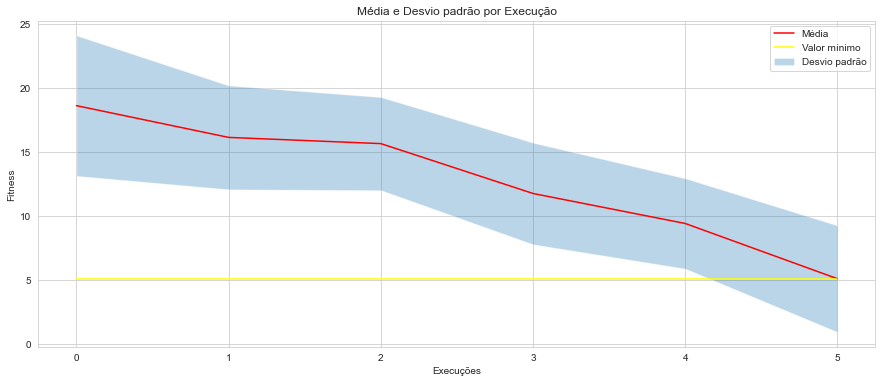

In [438]:
sbn.set_style("whitegrid")
plt.figure(figsize=(15,6))
plt.plot(df_dispersao2.index, df_dispersao2["mean"], label='Média', color="red")
plt.fill_between(range(len(df_dispersao2)), df_dispersao2["mean"]-df_dispersao2["std"], df_dispersao2["mean"]+df_dispersao2["std"], alpha=0.3, label='Desvio padrão')
plt.plot(df_dispersao2.index, [min(df_dispersao2["mean"]) for i in range(len(df_dispersao2.index))], label="Valor mínimo", color="yellow")
plt.xlabel('Execuções')
plt.ylabel('Fitness')
plt.title("Média e Desvio padrão por Execução")
plt.legend()
plt.show()

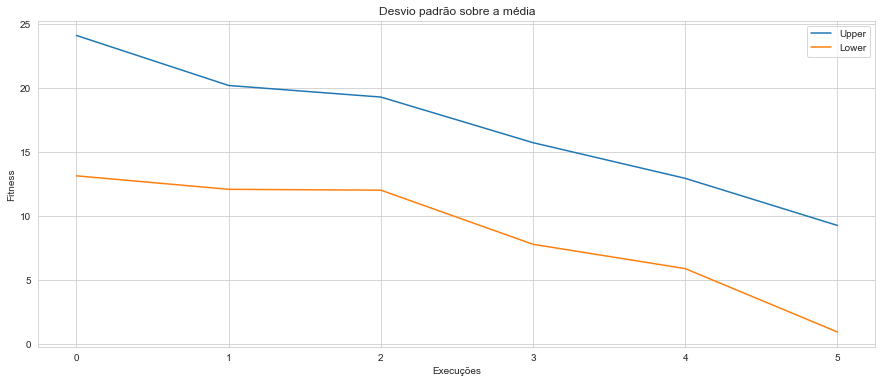

In [439]:
sbn.set_style("whitegrid")
plt.figure(figsize=(15,6))
plt.plot(df_dispersao2.index, df_dispersao2["mean"] + df_dispersao2["std"], label='Upper')
plt.plot(df_dispersao2.index, df_dispersao2["mean"] - df_dispersao2["std"], label='Lower')
plt.xlabel('Execuções')
plt.ylabel('Fitness')
plt.title("Desvio padrão sobre a média")
plt.legend()
plt.show()

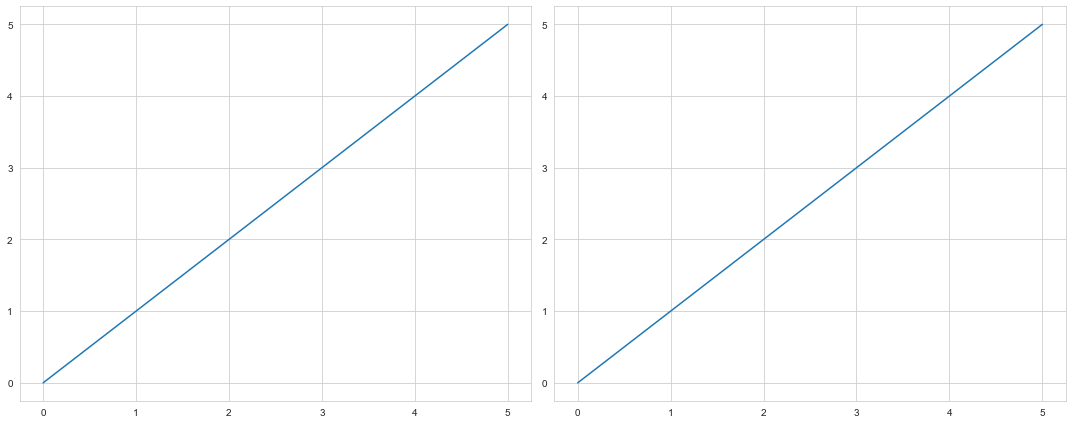

In [440]:
x1 = np.linspace(0.0, 5)
x2 = np.linspace(0.0, 5)
y1 = x2
y2 = x2

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
axes[0].plot(x1, y1)
axes[1].plot(x2, y2)
fig.tight_layout()

> <p align="justify">Através dos resultados apresentados podemos observar que a população está convergindo à solução ótima (se pensarmos em minimização) neste algoritmo quando vemos que a média continua se aproximando de zero.<br>
Podemos ainda visualizar através do gráficos acima que o desvio padrão (máximo e mínimo) calculado sobre os melhores resultados selecionados um entre todas as populações por execução se aproxima cada vez mais da curva que representa a média sobre os mesmos resultados selecionados, porém ainda apresenta um valor elevado em comparação à média, nos deixando com uma baixa confiabilidade no algoritmo.</p>
